In [78]:
%matplotlib notebook
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.stats import entropy

mpl.rcParams['agg.path.chunksize'] = 10000
mpl.rcParams.update({'agg.path.chunksize': 10000})
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
import scipy.stats as ss
import scipy.stats as stats
from scipy.special import gamma, gammaln
import scipy.special as special
import matplotlib.animation as animation
pd.options.display.max_columns = None
from sklearn.metrics import roc_curve, roc_auc_score, auc
pd.set_option('display.max_rows', 1000)

Set LDPC codeword length and get number of packets received.

In [79]:
# Set codeword length #
n = 88

if n == 54:
    N = 231880
if n == 88:
    N = 142290
if n == 124:
    N = 100980
if n == 540:
    N = 23188
if n == 880:
    N = 14229
if n == 1240:
    N = 10098

N = 120000
    
print("Codeword length: {}".format(n))
print("Number of codewords: {}".format(N))

Codeword length: 88
Number of codewords: 120000


Import the simulation data from csv files.

In [80]:
df_bit_level = pd.read_csv('packet-level-noise-estimation-88-44-static.csv', header=None)
print("Results data: {}".format(df_bit_level.shape))

Results data: (10560000, 10)


Create column names.

In [81]:
df_bit_level.columns = ['shiftedTrueBits',
                        'truePrec',
                        'recBits',
                        'model1DecodedBits',
                        'model1PrecAlpha',
                        'model1PrecBeta',
                        'model2DecodedBits',
                        'model2PrecAlpha',
                        'model2PrecBeta',
                        'modelIdealDecodedBits']

In [82]:
df_bit_level['model1PrecMean'] = df_bit_level['model1PrecAlpha'] / df_bit_level['model1PrecBeta']
df_bit_level['model1PrecVar'] = df_bit_level['model1PrecAlpha'] / (df_bit_level['model1PrecBeta']**2)

df_bit_level['model2PrecMean'] = df_bit_level['model2PrecAlpha'] / df_bit_level['model2PrecBeta']
df_bit_level['model2PrecVar'] = df_bit_level['model2PrecAlpha'] / (df_bit_level['model2PrecBeta']**2)

Calculate bit errors.

In [83]:
df_bit_level['trueBits'] = np.where(df_bit_level['shiftedTrueBits'] == -1, 0, 1).astype(int)

In [84]:
model1Decoded = np.where(df_bit_level['model1DecodedBits'] > 0.5, 1, 0).astype(int)
model2Decoded = np.where(df_bit_level['model2DecodedBits'] > 0.5, 1, 0).astype(int)
noFecDecoded = np.where(df_bit_level['recBits'] > 0.5, 1, 0).astype(int)
modelIdealDecoded = np.where(df_bit_level['modelIdealDecodedBits'] > 0.5, 1, 0).astype(int)

In [85]:
df_bit_level['model1Error'] = np.where(model1Decoded == df_bit_level['trueBits'], 0, 1)
df_bit_level['model2Error'] = np.where(model2Decoded == df_bit_level['trueBits'], 0, 1)
df_bit_level['noFecError'] = np.where(noFecDecoded == df_bit_level['trueBits'], 0, 1)
df_bit_level['modelIdealError'] = np.where(modelIdealDecoded == df_bit_level['trueBits'], 0, 1)

In [26]:
# df_bit_level[['trueBits',
#               'recBits',
#               'truePrec',
#               'model1PrecMean',
#               'model2PrecMean',
#               'model1Likehood',
#               'model2Likehood',
#               'likehoodRatio_db']]

<IPython.core.display.Javascript object>


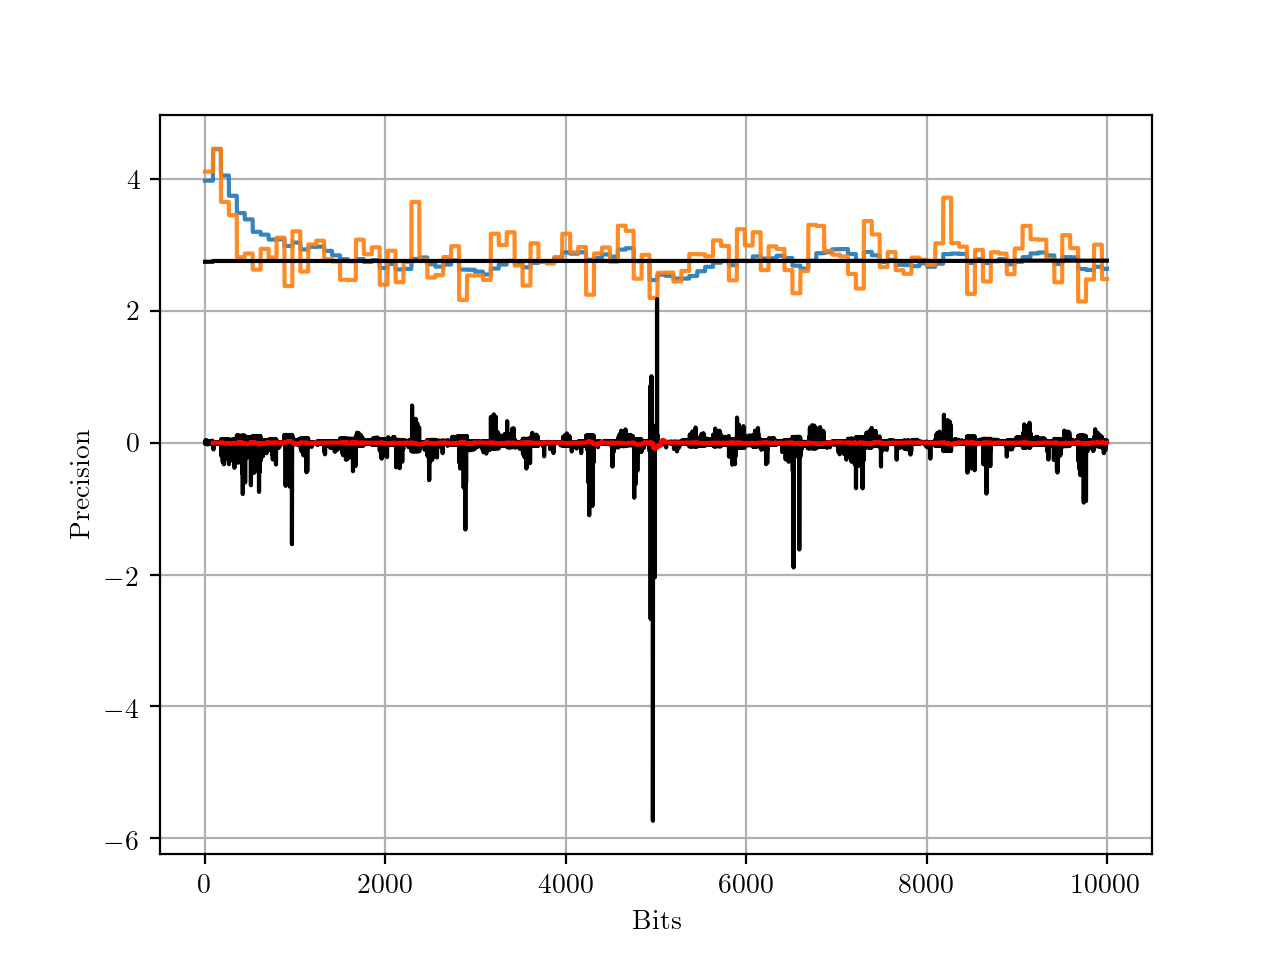

In [30]:
plt.plot(df_bit_level['model1PrecMean'][:10000], label='model 1 prec', alpha=0.9)
plt.plot(df_bit_level['model2PrecMean'][:10000], label='model 2 prec', alpha=0.9)
plt.plot(df_bit_level['truePrec'][:10000], label='true prec', color='black')

# plt.plot(df_bit_level['model1PrecMean'][:10000] - np.sqrt(df_bit_level['model1PrecVar'][:10000]), alpha=1, linewidth=1, rasterized=True, color='purple', label='1 Standard deviation')
# plt.plot(df_bit_level['model1PrecMean'][:10000] + np.sqrt(df_bit_level['model1PrecVar'][:10000]), alpha=1, linewidth=1, rasterized=True, color='purple')

# plt.plot(df_bit_level['model2PrecMean'][:10000] - np.sqrt(df_bit_level['model2PrecVar'][:10000]), alpha=1, linewidth=1, rasterized=True, color='green', label='1 Standard deviation')
# plt.plot(df_bit_level['model2PrecMean'][:10000] + np.sqrt(df_bit_level['model2PrecVar'][:10000]), alpha=1, linewidth=1, rasterized=True, color='green')

plt.plot(df_bit_level['likehoodRatio_db'][:10000], label='likehoodRatio_db', color='black')
plt.plot(df_bit_level['likehoodRatio_db'][:10000].rolling(88).mean(), label='likehoodRatio_db MA', color='red')


plt.legend()
plt.grid()
plt.xlabel("Bits")
plt.ylabel("Precision")
plt.show()

In [617]:
# x = np.linspace(-3, 2, 100)

# plt.plot(x, stats.norm.pdf(x, loc=-1, scale=np.sqrt(1 / 3.78491)), label='model 1')
# plt.plot(x, stats.norm.pdf(x, loc=-1, scale=np.sqrt(1 / 3.76559)), label='model 2')
# plt.plot(x, stats.norm.pdf(x, loc=-1, scale=np.sqrt(1 / 2.744)), label='true', color='black')
# plt.vlines(-1.98619, 0, 0.5, color='black', linestyle='--')
# plt.grid()
# plt.legend()
# plt.show()



In [658]:
# plt.hist(df_bit_level['likehoodRatio_db'][:3000].values, 1000)
# plt.show()

In [497]:
# df_bit_level[['truePrec',
#               'recBits',
#               'trueBits',
#               'likehoodRatio_db',
#               'model1DecodedBits',
#               'model2DecodedBits',
#               'model1PrecMean',
#               'model2PrecMean']].round(5)

In [482]:
# plt.hist(stats.norm.pdf(df_bit_level['recBits'], loc=1, scale=np.sqrt(1 / df_bit_level['model1PrecMean'])), 100)
# plt.hist(stats.norm.pdf(df_bit_level['recBits'], loc=1, scale=np.sqrt(1 / df_bit_level['model2PrecMean'])), 100)
# plt.show()

Calculate model evidence per bit: 
- $p(\theta_{m}|r)_{t} = \sum_{i} [b_t=i] \mathcal{N}_{i}(r_t|\mu_{i};\gamma_{t}^{-1})$
- log($p(\theta_{m}|r)_{t}$) = $\sum_t$ log($\sum_{i} [b_t=i] \mathcal{N}_{i}(r_t|\mu_{i};\gamma_{t}^{-1})$)
- $\ell(\theta_{m}|r)_{t} = \log(\frac{p(\theta_{m=1}|r)_{t}}{p(\theta_{m=2}|r)_{t}}) $.

In [86]:
# calculate the likelihood of x given the model
# the model is a student's t distribution
def studentst(x, alpha, beta, mu):
    p = 2 * alpha      # this is degrees of freedom
    lam = alpha / beta # this is the Gamma mean
    return (np.exp(gammaln((p + 1) / 2) - gammaln(p / 2))) * np.sqrt((lam / (np.pi * p))) * (1 / ((1 + ((lam / p) * (x - mu)**2)))**((p + 1) / 2))


In [87]:
df_bit_level['model1Likehood'] = ((1 - df_bit_level['model1DecodedBits']) * studentst(df_bit_level['recBits'],
                                                    df_bit_level['model1PrecAlpha'],
                                                    df_bit_level['model1PrecBeta'],
                                                    -1)) + \
((df_bit_level['model1DecodedBits']) * studentst(df_bit_level['recBits'],
                                                 df_bit_level['model1PrecAlpha'],
                                                 df_bit_level['model1PrecBeta'],
                                                 1))

df_bit_level['model2Likehood'] = ((1 - df_bit_level['model2DecodedBits']) * studentst(df_bit_level['recBits'],
                                                    df_bit_level['model2PrecAlpha'],
                                                    df_bit_level['model2PrecBeta'],
                                                    -1)) + \
((df_bit_level['model2DecodedBits']) * studentst(df_bit_level['recBits'],
                                                 df_bit_level['model2PrecAlpha'],
                                                 df_bit_level['model2PrecBeta'],
                                                 1))

df_bit_level['likehoodRatio_db'] = np.log(df_bit_level['model1Likehood'] / df_bit_level['model2Likehood'])

np.log(df_bit_level['model1Likehood']).mean(), np.log(df_bit_level['model2Likehood']).mean()

(-0.8213266624402105, -0.8183703144078691)

In [774]:
# df_bit_level['model1Likehood'] = ((1 - df_bit_level['model1DecodedBits']) * stats.norm.pdf(df_bit_level['recBits'],
#                                                                                            loc=-1,
#                                                                                            scale=np.sqrt(1 / df_bit_level['model1PrecMean']))) + ((df_bit_level['model1DecodedBits']) * stats.norm.pdf(df_bit_level['recBits'],
#                                                                                                                                                                                                        loc=1,
#                                                                                                                                                                                                        scale=np.sqrt(1 / df_bit_level['model1PrecMean'])))

# df_bit_level['model2Likehood'] = ((1 - df_bit_level['model2DecodedBits']) * stats.norm.pdf(df_bit_level['recBits'],
#                                                                                            loc=-1,
#                                                                                            scale=np.sqrt(1 / df_bit_level['model2PrecMean']))) + (((df_bit_level['model2DecodedBits']) * stats.norm.pdf(df_bit_level['recBits'],
#                                                                                                                                                                                                         loc=1,
#                                                                                                                                                                                                         scale=np.sqrt(1 / df_bit_level['model2PrecMean']))))

# df_bit_level['logmodel1Likehood'] = np.log(df_bit_level['model1Likehood'])
# df_bit_level['logmodel2Likehood'] = np.log(df_bit_level['model2Likehood'])

# df_bit_level['likehoodRatio_db'] = df_bit_level['logmodel1Likehood'] - df_bit_level['logmodel2Likehood']

# df_bit_level['logmodel1Likehood'].mean(), df_bit_level['logmodel2Likehood'].mean()

Create packet identification.

In [88]:
ids = [[i]*n for i in range(N)]
packet_ids = [item for sublist in ids for item in sublist]
df_bit_level['packet_id'] = packet_ids

In [89]:
df_bit_level['mean_likehoodRatio_db'] = df_bit_level[['packet_id',
                                                      'likehoodRatio_db']].groupby('packet_id').mean().values.repeat(n)


In [90]:
avgLLR = df_bit_level[['packet_id', 'likehoodRatio_db']].groupby('packet_id').mean()
sumLLR = df_bit_level[['packet_id', 'likehoodRatio_db']].groupby('packet_id').sum()

sumLLR[sumLLR['likehoodRatio_db'] >= 0].shape, avgLLR[avgLLR['likehoodRatio_db'] >= 0].shape

((48308, 1), (48308, 1))

<IPython.core.display.Javascript object>


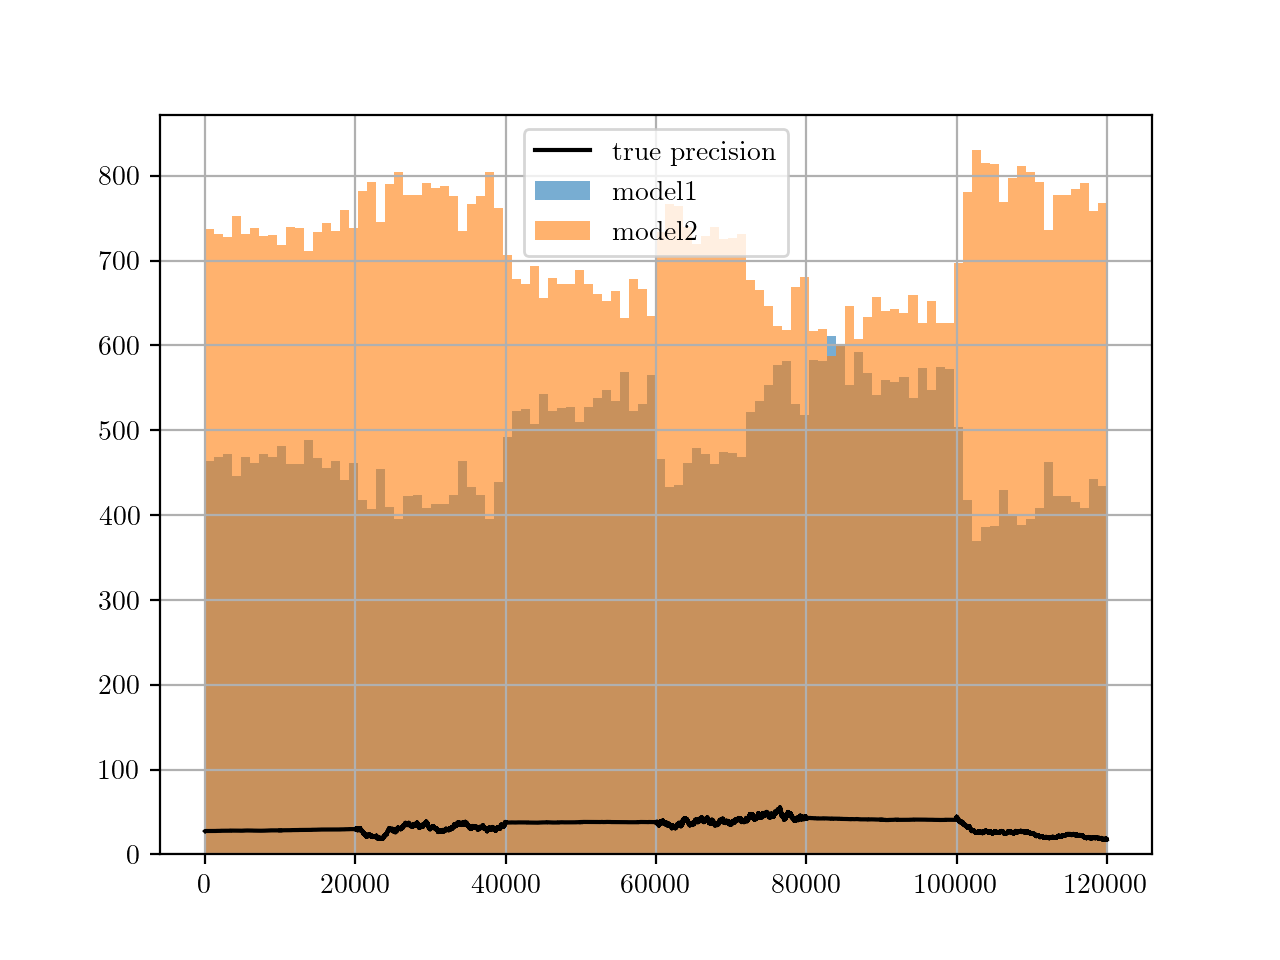

In [34]:
plt.hist(avgLLR[avgLLR['likehoodRatio_db'] >= 0].index.values, 100, alpha=0.6, label='model1')
plt.hist(avgLLR[avgLLR['likehoodRatio_db'] < 0].index.values, 100, alpha=0.6, label='model2')
plt.plot(10*df_bit_level[['packet_id', 'truePrec']].groupby('packet_id').mean(), color='black', label='true precision')
plt.grid()
plt.legend()
plt.show()

In [91]:
df_bit_level['ma_likehoodRatio_db'] = df_bit_level['likehoodRatio_db'].rolling(88).mean()[n-1::n].repeat(n).values


In [92]:
nan_list = df_bit_level[df_bit_level['ma_likehoodRatio_db'].isnull()].index.values

In [93]:
df_bit_level.loc[nan_list, 'ma_likehoodRatio_db'] = df_bit_level.loc[nan_list, 'mean_likehoodRatio_db']

In [94]:
# (np.log(df_bit_level['logmodel1Likehood'].rolling(100000).mean() / df_bit_level['logmodel2Likehood'].rolling(100000).mean())).plot()
# plt.show()

The model with the highest log likelihood of all the models wins.

<IPython.core.display.Javascript object>


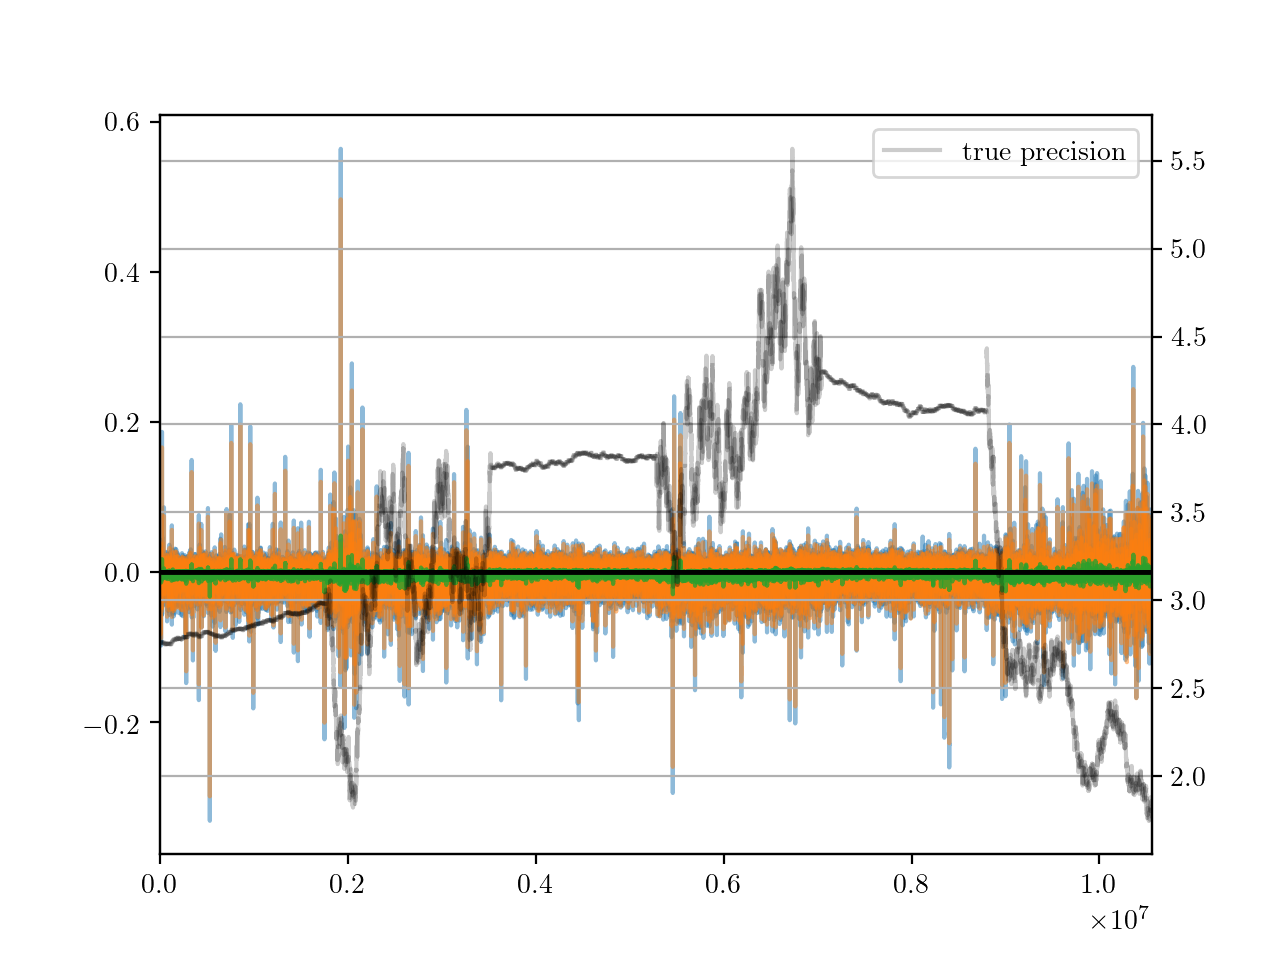

In [39]:
# df_bit_level['mean_likehoodRatio_db'] = df_bit_level[['packet_id',
#                                                       'likehoodRatio_db']].groupby('packet_id').mean().values.repeat(88)
df_bit_level['likehoodRatio_db'].rolling(88).mean().plot(label='88', alpha=0.5)
df_bit_level['likehoodRatio_db'].rolling(100).mean().plot(label='100', alpha=0.5)
df_bit_level['likehoodRatio_db'].rolling(1000).mean().plot(label='1000', alpha=0.8)
# df_bit_level['logmodel1Likehood'].rolling(10000).mean().plot(label='m1')
# df_bit_level['logmodel2Likehood'].rolling(10000).mean().plot(label='m2')
plt.plot(range(N*88), np.repeat(0, N*88), color='black')
# np.log(df_bit_level['likehoodRatio'].rolling(10000).mean()).plot(label='10000')
df_bit_level['truePrec'].plot(label='true precision', secondary_y=True, color='black', alpha=0.2)

plt.legend()
plt.grid()
# plt.xlim([0, 60000])
# plt.ylim([-0.03, 0.03])
plt.show()

In [95]:
df_bit_level['bestModel'] = np.where(df_bit_level['ma_likehoodRatio_db'] >= 0, 'm1', 'm2')

In [96]:
# fig, ax = plt.subplots(1)
# ax.plot(df_bit_level['model2PrecMean'], label='model 2 prec', color='orange')
# ax.plot(df_bit_level['model1PrecMean'], label='model 1 prec', color='blue')
# ax.plot(df_bit_level['truePrec'], label='true prec', color='black')
# # plt.vlines(df_bit_level[df_bit_level['bestModel'] == 'm1'].index, 5, 0, color='gray', linestyle='--')
# ax2 = ax.twinx()
# ax2.hist(df_bit_level[df_bit_level['bestModel'] == 'm1'].index, 200, color='gray', alpha=0.4)
# # ax2.hist(df_bit_level[df_bit_level['bestModel'] == 'm2'].index, 200, color='green', alpha=0.4)
# # plt.legend()
# plt.show()

In [97]:
df_bit_level['bestDecoderError'] = np.where(df_bit_level['ma_likehoodRatio_db'] >= 0,
                                            df_bit_level['model1Error'],
                                            df_bit_level['model2Error'])

In [98]:
df_bit_level['model1PacketError'] = df_bit_level[['packet_id', 'model1Error']].groupby('packet_id').sum().values.repeat(n)
df_bit_level['model2PacketError'] = df_bit_level[['packet_id', 'model2Error']].groupby('packet_id').sum().values.repeat(n)
df_bit_level['bestModelPacketError'] = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().values.repeat(n)



Create cumulative bit error columns.

In [99]:
df_bit_level['model1ErrorsCum'] = df_bit_level['model1Error'].cumsum()
df_bit_level['model2ErrorsCum'] = df_bit_level['model2Error'].cumsum()
df_bit_level['noFecErrorsCum'] = df_bit_level['noFecError'].cumsum()
df_bit_level['modelIdealErrorsCum'] = df_bit_level['modelIdealError'].cumsum()
df_bit_level['bestDecoderErrorsCum'] = df_bit_level['bestDecoderError'].cumsum()

In [100]:
df_bit_level[['model1ErrorsCum', 'model2ErrorsCum', 'modelIdealErrorsCum', 'bestDecoderErrorsCum']].iloc[-1]

model1ErrorsCum         10668
model2ErrorsCum         10945
modelIdealErrorsCum     10911
bestDecoderErrorsCum    10764
Name: 10559999, dtype: int64

In [101]:
df_bit_level['bestModelPrecMean'] = np.where(df_bit_level['bestModel'] == 'm1',
                                             df_bit_level['model1PrecMean'],
                                             df_bit_level['model2PrecMean'])
df_bit_level['bestModelPrecVar'] = np.where(df_bit_level['bestModel'] == 'm1',
                                            df_bit_level['model1PrecVar'],
                                            df_bit_level['model2PrecVar'])

<IPython.core.display.Javascript object>


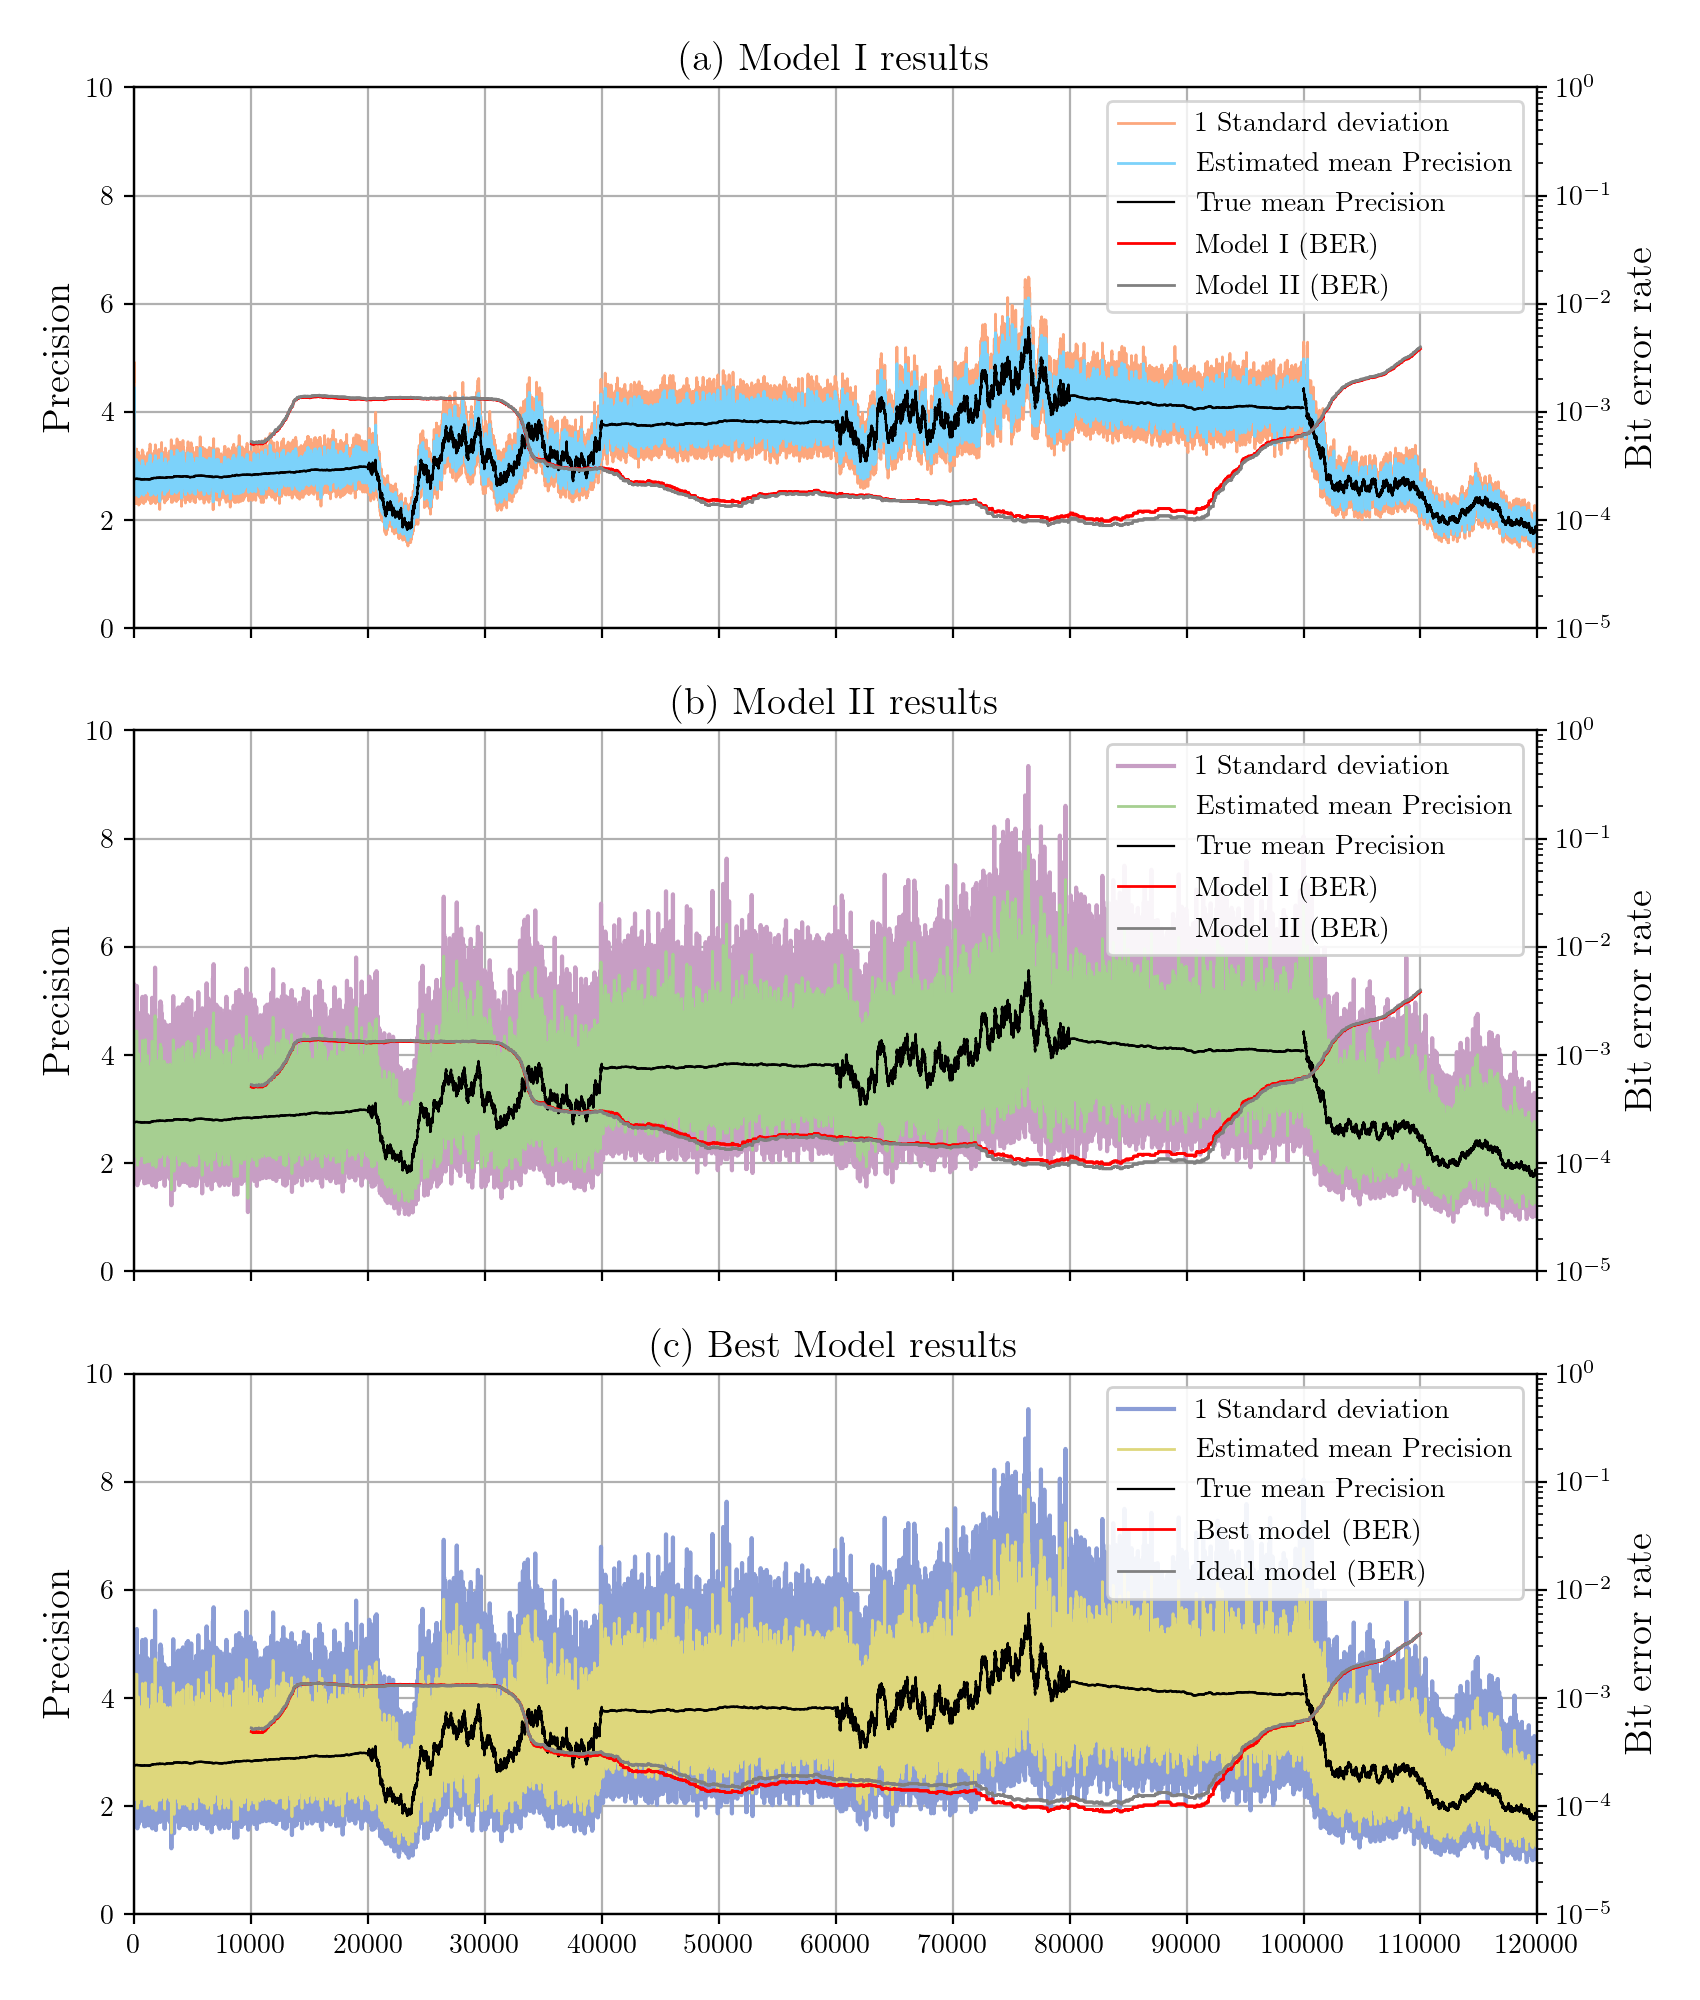

In [108]:

error_ma = n*20000

fig, ax = plt.subplots(3, gridspec_kw={'height_ratios':[5.5, 5.5, 5.5]}, sharex=True)
fig.set_size_inches(8.5, 10)

y = df_bit_level['model1PrecMean']
error = np.sqrt(df_bit_level['model1PrecVar'])

ax[0].plot((y - error), alpha=1, linewidth=1, rasterized=True, color='#fca77d', label='1 Standard deviation')
ax[0].plot((y + error), alpha=1, linewidth=1, rasterized=True, color='#fca77d')

ax[0].plot((df_bit_level['model1PrecMean']), label='Estimated mean Precision', color='#7cd2fa', alpha=1, linewidth=1)
ax[0].plot((df_bit_level['truePrec']), rasterized=True, label='True mean Precision', color='black', alpha=1, linewidth=0.8)

ax[0].set_ylabel("Precision", color="black", fontsize=14)
# ax[0].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
ax[0].set_title("(a) Model I results", color="black", fontsize=14)

ax2 = ax[0].twinx()

ax2.plot(df_bit_level['model1Error'].rolling(error_ma, center=True).mean(),
         color='red',
         label='Model I (BER)',
         alpha=1,
         linewidth=1)

ax2.plot(df_bit_level['model2Error'].rolling(error_ma, center=True).mean(),
         color='gray',
         label='Model II (BER)',
         linestyle='-',
         alpha=1,
         linewidth=1)

ax2.set_ylabel("Bit error rate", color="black", fontsize=14)
ax2.set_yscale('log')
ax2.set_yticks([(10)**-5, (10)**-4, (10)**-3, (10)**-2, (10)**-1, (10)**0])

ax[0].set_xlim([0, N*n])
ax[0].set_ylim([0, 10])
ax[0].set_xticks(np.arange(0, (N+1)*n, n*10000))
ax[0].set_xticklabels(np.arange(0, (N+1), 10000))

ax[0].grid()

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, loc='upper right', facecolor='white', framealpha=0.8)
#--------------------------------------------------------------#

y = df_bit_level['model2PrecMean']
error = np.sqrt(df_bit_level['model2PrecVar'])

ax[1].plot((y - error), alpha=1, rasterized=True, color='#c79ec4', label='1 Standard deviation')
ax[1].plot((y + error), alpha=1, rasterized=True, color='#c79ec4')

ax[1].plot((df_bit_level['model2PrecMean']), label='Estimated mean Precision', color='#a6cf91', alpha=1, linewidth=1)
ax[1].plot((df_bit_level['truePrec']), rasterized=True, label='True mean Precision', alpha=1, color='black', linewidth=0.8)

ax[1].set_ylabel("Precision", color="black", fontsize=14)
# ax[1].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
ax[1].set_title("(b) Model II results", color="black", fontsize=14)

ax2 = ax[1].twinx()

ax2.plot(df_bit_level['model1Error'].rolling(error_ma, center=True).mean(),
         color='red',
         label='Model I (BER)',
         linewidth=1,
         alpha=1)

ax2.plot(df_bit_level['model2Error'].rolling(error_ma, center=True).mean(),
         color='gray',
         label='Model II (BER)',
         linestyle='-',
         linewidth=1,
         alpha=1)

ax2.set_ylabel("Bit error rate", color="black", fontsize=14)
ax2.set_yscale('log')
ax2.set_yticks([(10)**-5, (10)**-4, (10)**-3, (10)**-2, (10)**-1, (10)**0])

ax[1].set_xlim([0, N*n])
ax[1].set_ylim([0, 10])
ax[1].set_xticks(np.arange(0, (N+1)*n, n*10000))
ax[1].set_xticklabels(np.arange(0, (N+1), 10000))
ax[1].grid()

handles, labels = ax[1].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, loc='upper right', facecolor='white', framealpha=0.9)
#--------------------------------------------------------------#

y = df_bit_level['bestModelPrecMean']
error = np.sqrt(df_bit_level['bestModelPrecVar'])

ax[2].plot((y - error), alpha=1, rasterized=True, color='#8b9dd6', label='1 Standard deviation')
ax[2].plot((y + error), alpha=1, rasterized=True, color='#8b9dd6')

ax[2].plot((df_bit_level['bestModelPrecMean']), label='Estimated mean Precision', color='#ded77c', alpha=1, linewidth=1)
ax[2].plot((df_bit_level['truePrec']), rasterized=True, label='True mean Precision', alpha=1, color='black', linewidth=0.8)

ax[2].set_ylabel("Precision", color="black", fontsize=14)
# ax[2].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
ax[2].set_title("(c) Best Model results", color="black", fontsize=14)

ax2 = ax[2].twinx()

ax2.plot(df_bit_level['bestDecoderError'].rolling(error_ma, center=True).mean(),
         color='red',
         label='Best model (BER)',
         linestyle='-',
         linewidth=1,
         alpha=1)
ax2.plot(df_bit_level['modelIdealError'].rolling(error_ma, center=True).mean(),
         color='gray',
         label='Ideal model (BER)',
         linestyle='-',
         linewidth=1,
         alpha=1)

ax2.set_ylabel("Bit error rate", color="black", fontsize=14)
ax2.set_yscale('log')
ax2.set_yticks([(10)**-5, (10)**-4, (10)**-3, (10)**-2, (10)**-1, (10)**0])

ax[2].set_xlim([0, N*n])
ax[2].set_ylim([0, 10])
ax[2].set_xticks(np.arange(0, (N+1)*n, n*10000))
ax[2].set_xticklabels(np.arange(0, (N+1), 10000))
ax[2].grid()

handles, labels = ax[2].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, loc='upper right', facecolor='white', framealpha=0.9)
#--------------------------------------------------------------#

fig.tight_layout(pad=1.5)
plt.savefig('non-stationary-result.png', bbox_inches='tight')
plt.show()

Create SNR estimation and BER plots.

<IPython.core.display.Javascript object>


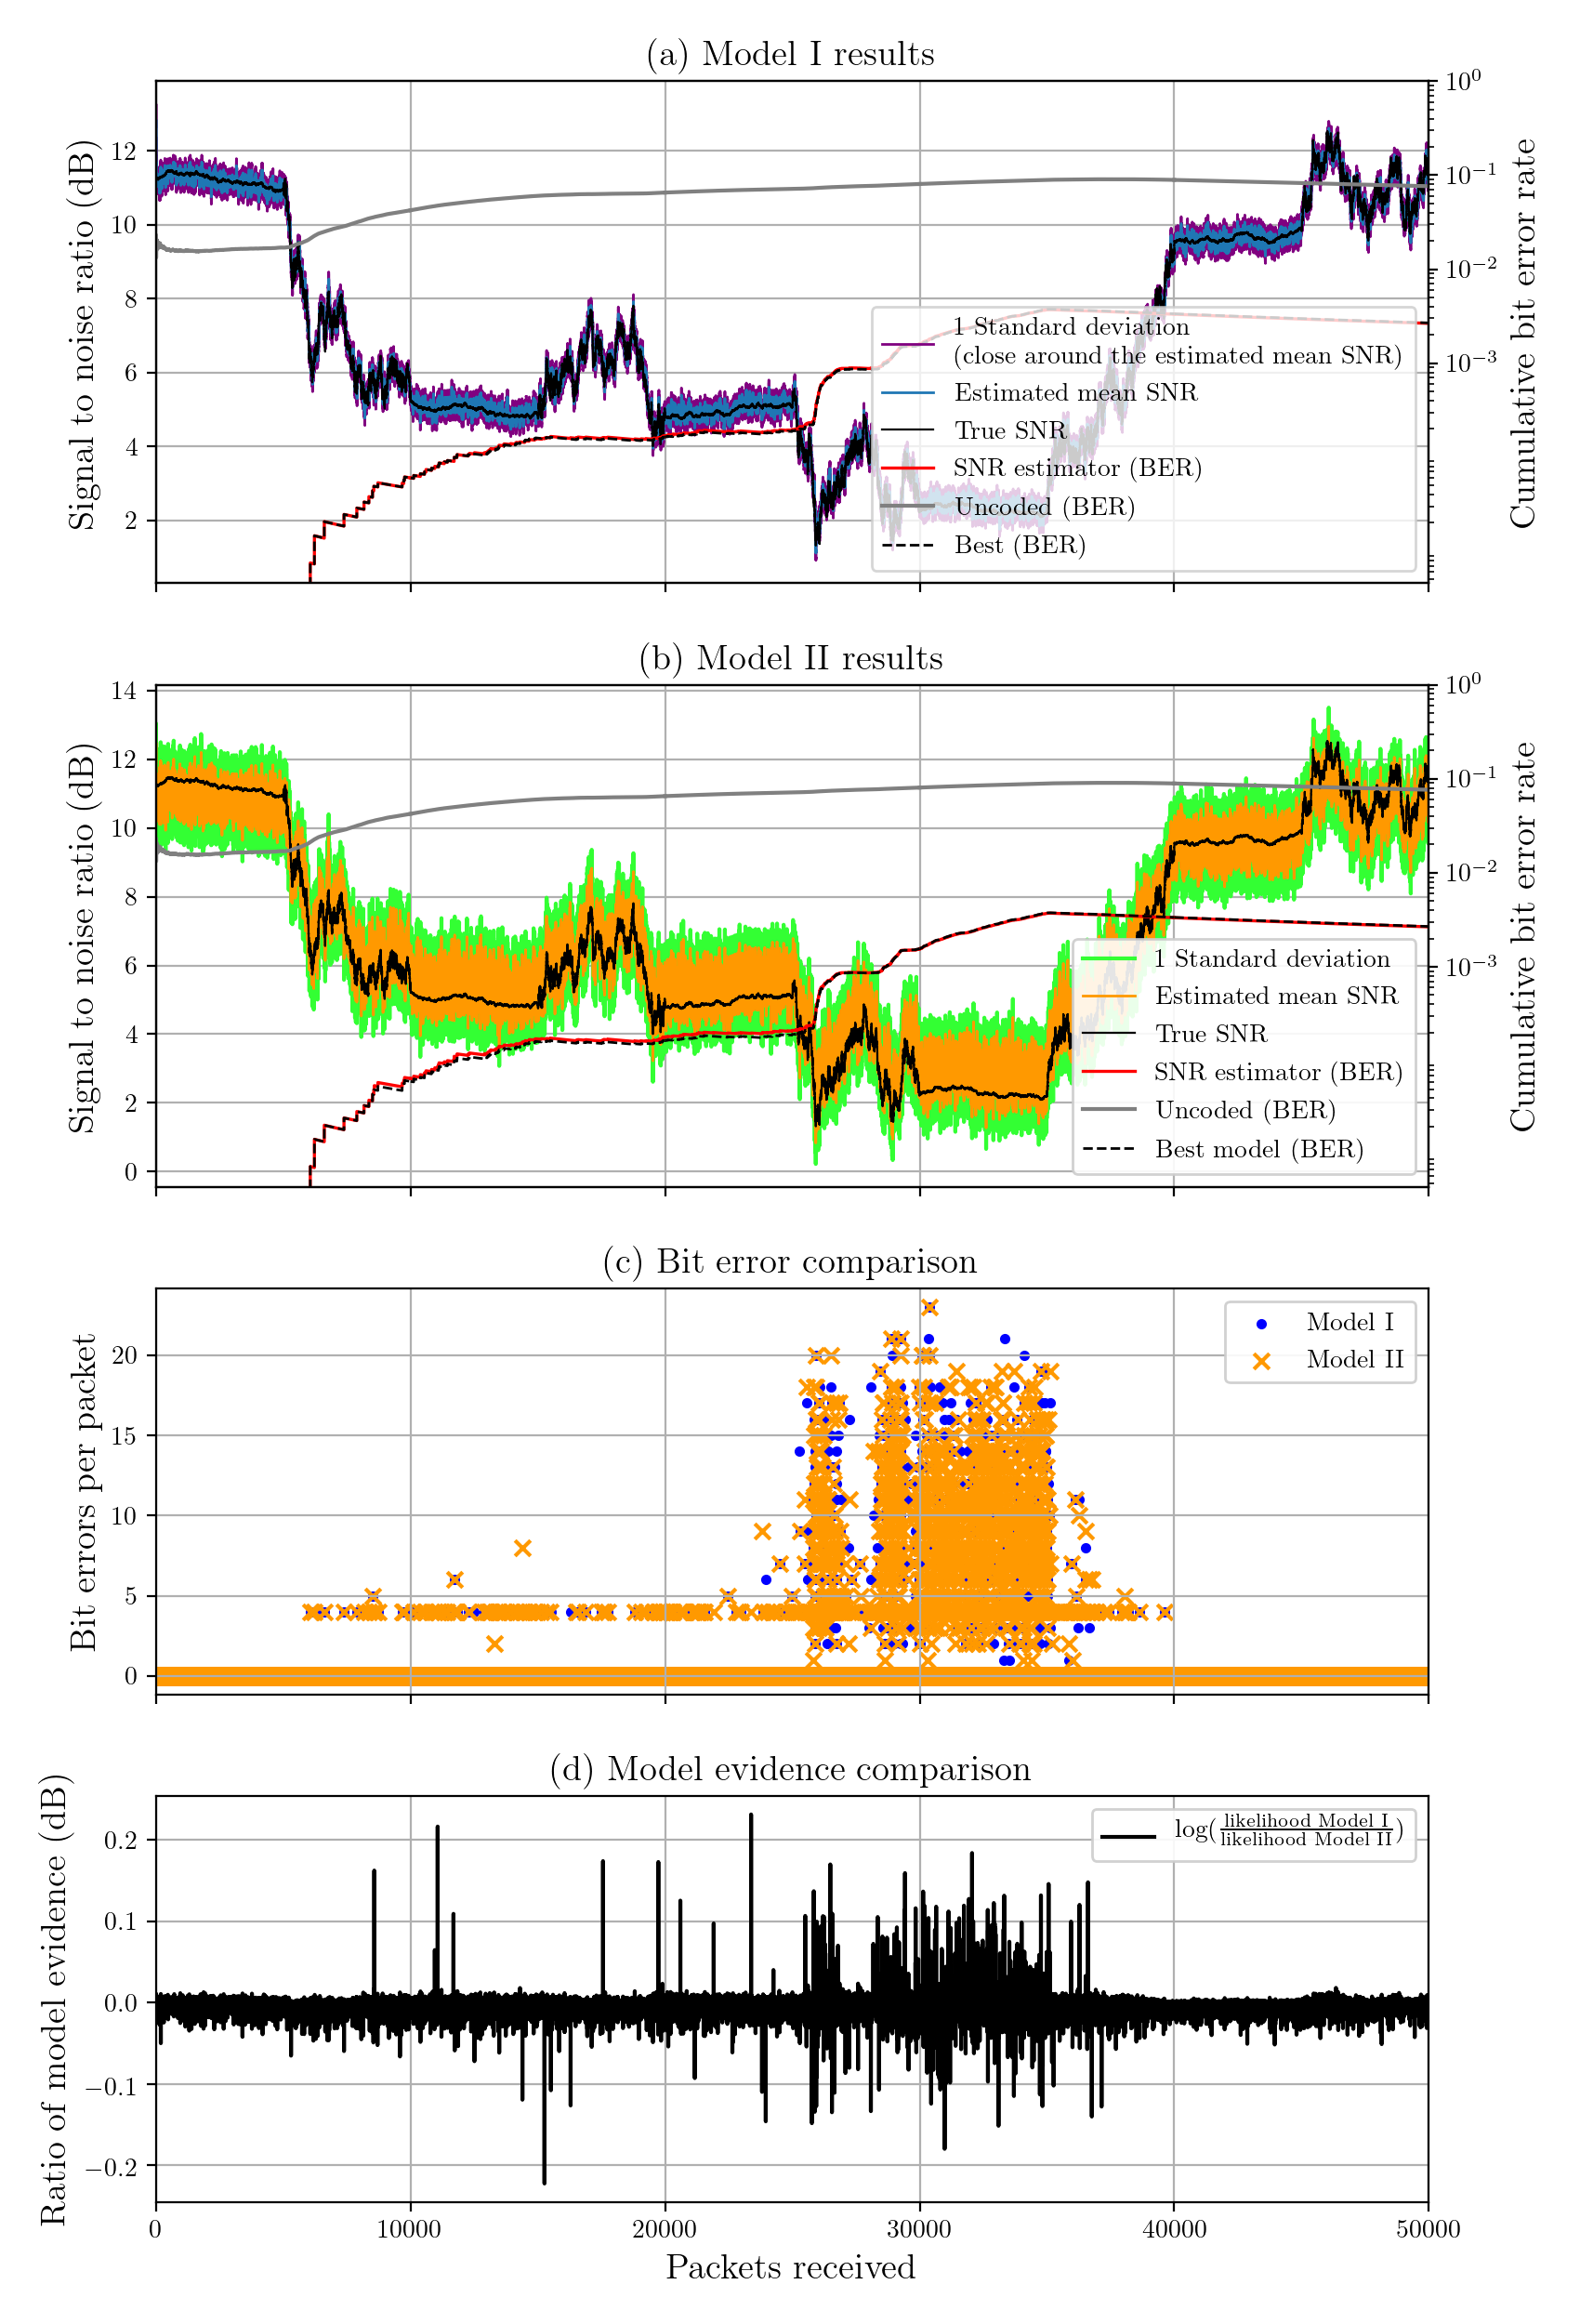

Model 1 BER: 0.0026536363636363637
Model 2 BER: 0.002659318181818182
Best Model BER: 0.0026852272727272727


In [180]:
fig, ax = plt.subplots(4, gridspec_kw={'height_ratios':[6.8, 6.8, 5.5, 5.5]}, sharex=True)
fig.set_size_inches(8.5, 12.5)

y = df_bit_level['model1PrecMean']
error = np.sqrt(df_bit_level['model1PrecVar'])

ax[0].plot(10*np.log10(y - error), alpha=1, linewidth=1, rasterized=True, color='purple', label='1 Standard deviation\n(close around the estimated mean SNR)')
ax[0].plot(10*np.log10(y + error), alpha=1, linewidth=1, rasterized=True, color='purple')

ax[0].plot(10*np.log10(df_bit_level['model1PrecMean']), label='Estimated mean SNR', alpha=1, linewidth=1)
ax[0].plot(10*np.log10(df_bit_level['truePrec']), rasterized=True, label='True SNR', color='black', alpha=1, linewidth=0.8)

# ax[0].fill_between(range(10000*n), 10*np.log10(y - error), 10*np.log10(y + error), alpha=0.2, rasterized=True, color='purple', label='1 Standard deviation')

ax[0].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
# ax[0].set_xlabel("Packets received", color="black", fontsize=12)
ax[0].set_title("(a) Model I results", color="black", fontsize=14)

ax2 = ax[0].twinx()

model1cumerrors = df_bit_level[['packet_id', 'model1Error']].groupby('packet_id').sum().cumsum()
model1cumerrors = model1cumerrors['model1Error'] / ((model1cumerrors.index + 1) * n)

ax2.plot(np.arange(n, ((N+1)*n), n), model1cumerrors,
         label='SNR estimator (BER)',
         color='red',
         linewidth=1.2)
# ax2.plot(df[25] / 44, label='SNR Estimator (BER)', color='red', linewidth=1, alpha=0.1)
noFECcumerrors = df_bit_level[['packet_id', 'noFecError']].groupby('packet_id').sum().cumsum()
noFECcumerrors = noFECcumerrors['noFecError'] / ((noFECcumerrors.index + 1) * n)

ax2.plot(np.arange(n, ((N+1)*n), n), noFECcumerrors, 
         label='Uncoded (BER)',
         color='gray',
         rasterized=True,
         linewidth=1.5)
modelidealcumerrors = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().cumsum()
modelidealcumerrors = modelidealcumerrors['bestDecoderError'] / ((modelidealcumerrors.index + 1) * n)

ax2.plot(np.arange(n, ((N+1)*n), n), modelidealcumerrors,
         label='Best (BER)',
         color='black', 
         linestyle='--',
         rasterized=True,
         linewidth=1)
ax2.set_ylabel("Cumulative bit error rate", color="black", fontsize=14)
# ax2.set_yscale('symlog', linthreshy=0.0015)
ax2.set_yscale('log')
ax2.set_yticks([(10)**-3, (10)**-2, (10)**-1, (10)**0])
ax[0].set_xlim([0, N*n])
ax[0].set_xticks(np.arange(0, (N+1)*n, n*10000))
ax[0].set_xticklabels(np.arange(0, (N+1), 10000))

ax[0].grid()

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, loc='lower right', facecolor='white', framealpha=0.8)

y = df_bit_level['model2PrecMean']
error = np.sqrt(df_bit_level['model2PrecVar'])

ax[1].plot(10*np.log10(y - error), alpha=1, rasterized=True, color='#33ff33', label='1 Standard deviation')
ax[1].plot(10*np.log10(y + error), alpha=1, rasterized=True, color='#33ff33')

# ax[1].fill_between(range(10000*n), 10*np.log10(y - error), 10*np.log10(y + error), alpha=0.8, rasterized=True, color='#33ff33', label='1 Standard deviation')

ax[1].plot(10*np.log10(df_bit_level['model2PrecMean']), label='Estimated mean SNR', color='#ff9900', alpha=1, linewidth=1)
ax[1].plot(10*np.log10(df_bit_level['truePrec']), rasterized=True, label='True SNR', alpha=1, color='black', linewidth=0.8)

ax[1].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
# # ax[1].set_xlabel("Packets received", color="black", fontsize=12)
# # ax[1].set_ylim([-25, 25])
ax[1].set_title("(b) Model II results", color="black", fontsize=14)

ax2 = ax[1].twinx()
model1cumerrors = df_bit_level[['packet_id', 'model2Error']].groupby('packet_id').sum().cumsum()
model1cumerrors = model1cumerrors['model2Error'] / ((model1cumerrors.index + 1) * n)

ax2.plot(np.arange(n, ((N+1)*n), n), model1cumerrors,
         label='SNR estimator (BER)',
         color='red',
         linewidth=1.2)
# ax2.plot(df[25] / 44, label='SNR Estimator (BER)', color='red', linewidth=1, alpha=0.1)
noFECcumerrors = df_bit_level[['packet_id', 'noFecError']].groupby('packet_id').sum().cumsum()
noFECcumerrors = noFECcumerrors['noFecError'] / ((noFECcumerrors.index + 1) * n)

ax2.plot(np.arange(n, ((N+1)*n), n), noFECcumerrors, 
         label='Uncoded (BER)',
         color='gray',
         rasterized=True,
         linewidth=1.5)
modelidealcumerrors = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().cumsum()
modelidealcumerrors = modelidealcumerrors['bestDecoderError'] / ((modelidealcumerrors.index + 1) * n)

ax2.plot(np.arange(n, ((N+1)*n), n), modelidealcumerrors,
         label='Best model (BER)',
         color='black', 
         linestyle='--',
         rasterized=True,
         linewidth=1)
ax2.set_ylabel("Cumulative bit error rate", color="black", fontsize=14)
# ax2.set_yscale('symlog', linthreshy=0.0015)
ax2.set_yscale('log')
ax2.set_yticks([(10)**-3, (10)**-2, (10)**-1, (10)**0])
ax[1].set_xlim([0, N*n])
ax[1].set_xticks(np.arange(0, (N+1)*n, n*10000))
ax[1].set_xticklabels(np.arange(0, (N+1), 10000))
# ax2.set_ylim([0.001, 0.3])
# ax2.set_xlim()
# ax2.semilogy(range(10000), np.log(range(10000)))
ax[1].grid()

handles, labels = ax[1].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, loc='lower right', facecolor='white', framealpha=0.9)

# ax3 = ax[2].twinx()
# df_error_correction[['model1errors', 'model2errors']].plot(kind='bar', ax=ax3, stacked=True)
ax[2].scatter(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'model1Error']].groupby('packet_id').sum(),
              color='blue',
              marker='.',
              label='Model I',
              alpha=1)
ax[2].scatter(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'model2Error']].groupby('packet_id').sum(),
              color='#ff9900',
              marker='x',
              label='Model II',
              alpha=1)

ax[2].set_ylabel("Bit errors per packet", color="black", fontsize=14)
ax[2].set_title("(c) Bit error comparison", color="black", fontsize=14)
ax[2].grid()
handles, labels = ax[2].get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
ax[2].legend(handles, labels, loc='upper right', facecolor='white', framealpha=0.9)


ax[3].set_ylabel("Ratio of model evidence (dB)", color="black", fontsize=14)
ax[3].plot(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'likehoodRatio_db']].groupby('packet_id').mean(), color='black', alpha=1, label=r'$\textrm{log}(\frac{\textrm{likelihood Model I}}{\textrm{likelihood Model II}})$')
ax[3].set_xlabel("Packets received", color="black", fontsize=14)
ax[3].set_title("(d) Model evidence comparison", color="black", fontsize=14)
ax[3].grid()
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(handles, labels, loc='upper right', facecolor='white', framealpha=0.9)

# ax[3].vlines(np.arange(0, 12521520, 540), -50, 50, linestyle=':', alpha=0.5)
# plt.xticks(np.arange(12320000, 12521520, 88))

# ax3 = ax[3].twinx()
# ax3.plot(np.arange(1000, ((N)*n)+1000, 1000),
#          df_bit_level[['likehoodRatio_db']].groupby(df_bit_level.index // 1000).mean().values,
#          color='red')

fig.tight_layout(pad=1.5)

plt.savefig('non-stationary-result.png', bbox_inches='tight')

plt.show()

TotalBERModel1 = df_bit_level['model1ErrorsCum'].iloc[-1] / df_bit_level.shape[0]
TotalBERModel2 = df_bit_level['model2ErrorsCum'].iloc[-1] / df_bit_level.shape[0]
TotalBERModel3 = df_bit_level['bestDecoderErrorsCum'].iloc[-1] / df_bit_level.shape[0]
print("Model 1 BER: {}".format(TotalBERModel1))
print("Model 2 BER: {}".format(TotalBERModel2))
print("Best Model BER: {}".format(TotalBERModel3))

In [150]:
a = df_bit_level[88*40000:]['likehoodRatio_db'].values

<IPython.core.display.Javascript object>


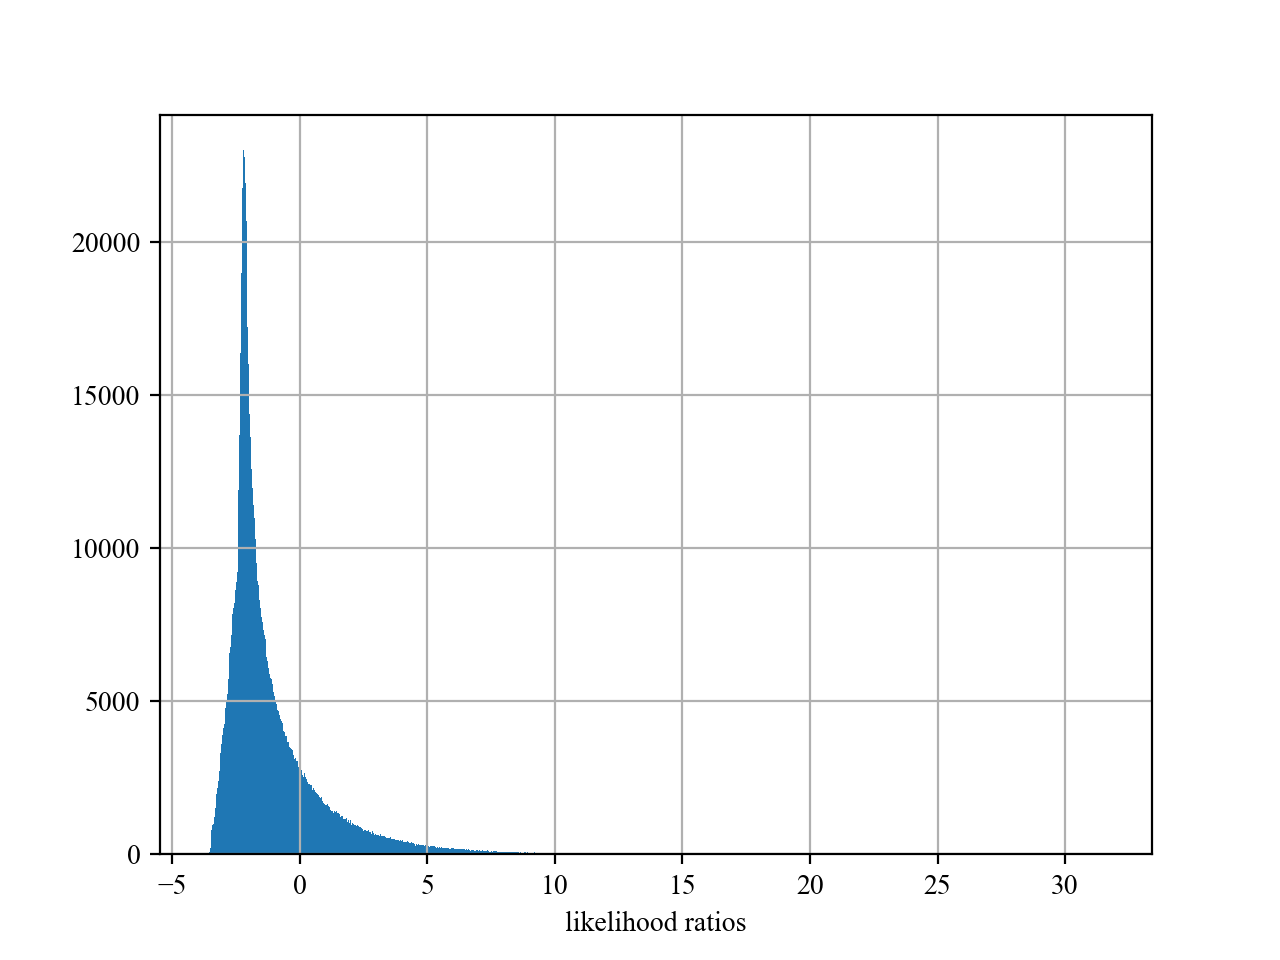

In [163]:
plt.hist(a, 1000)
plt.xlabel("likelihood ratios")
plt.show()

In [155]:
# df_bit_level[88*40000:][['packet_id',
#                      'trueBits',
#                      'truePrec',
#                      'recBits',
#                      'model1DecodedBits',
#                      'model1PrecMean',
#                      'model2DecodedBits',
#                      'model2PrecMean',
#                      'modelIdealDecodedBits',
#                      'model1Likehood',
#                      'model2Likehood',
#                      'likehoodRatio_db']]

In [3]:
# df_bit_level['diff'] = df_bit_level['model1Error'] - df_bit_level['model2Error']

In [196]:
# plt.hist(df_bit_level['model1Likehood'], 1000)
# plt.hist(df_bit_level['model2Likehood'], 1000, alpha=0.6)
# plt.show()

In [4]:
# model1err = df_bit_level[df_bit_level['diff'] == 1]['bitsTruePrec'].values
# model2err = df_bit_level[df_bit_level['diff'] == -1]['bitsTruePrec'].values

In [89]:
# plt.boxplot([model1err, model2err])
# plt.xticks([1, 2], ['model1err', 'model2err'])
# plt.show()

In [90]:
# fig, axs = plt.subplots(1)
# p = axs.scatter(df_bit_level['llhr_db'],
#                 df_bit_level['diff'], 
#                 marker='.',
#                 c=df_bit_level['bitsTruePrec'],
#                 cmap='inferno')
# # q = axs[1].scatter(df_bit_level['llhr_db'],
# #             df_bit_level['model2errors'], 
# #             c=df_bit_level['snr'], 
# #             marker='.',
# #             alpha=0.7,
# #             cmap='magma')

# # fig.colorbar(p, ax=axs[0])
# fig.colorbar(p, ax=axs)
# # axs[1].colorbar()
# plt.grid()
# plt.show()

In [91]:
# # (df_bit_level['model1errorsCum'] / df_bit_level.index).plot(label='M1')
# # (df_bit_level['model2errorsCum'] / df_bit_level.index).plot(label='M2')
# # (df_bit_level['noFECerrorsCum'] / df_bit_level.index).plot(label='NoFEC')
# # (df_bit_level['modelidealerrorsCum'] / df_bit_level.index).plot(label='ideal', linestyle='--')
# plt.scatter(range(df_bit_level.shape[0]), df_bit_level['model1error'] - df_bit_level['model2error'])
# plt.plot(10*np.log10(df_bit_level['bitsTruePrec']), label='TrueSNR', color='black')
# # plt.plot(10*np.log10(df_bit_level['model1PrecMean']), label='M1SNR', color='blue', alpha=0.5)
# # plt.plot(10*np.log10(df_bit_level['model2PrecMean']), label='M2SNR', color='orange', alpha=0.5)
# # plt.yscale('log')
# # plt.legend()
# plt.show()

In [92]:
# plt.scatter(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'model1error']].groupby('packet_id').sum())
# plt.scatter(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'model2error']].groupby('packet_id').sum())
# plt.plot(10*np.log10(df_bit_level['bitsTruePrec']), label='True SNR', color='black', alpha=0.78, linewidth=0.8)

# plt.show()

In [5]:
# 1/2, 2/3, 3/4, 5/6, 10/11, 20/21, 50/51, 400/401

In [6]:
# plt.hist(df_bit_level['model1PrecMean'] - df_bit_level['bitsTruePrec'], 500)
# plt.hist(df_bit_level['model2PrecMean'] - df_bit_level['bitsTruePrec'], 500)

# plt.show()


In [80]:
# plt.scatter(df_bit_level['model1entropy'], df_bit_level['model2entropy'])
# plt.plot(df_bit_level['model2entropy'])
# plt.plot(df_bit_level['model1PrecMean'])
# plt.plot(df_bit_level['bitsTruePrec'], color='black')
# plt.show()

In [81]:
# fpr, tpr, thresholds = roc_curve(df_bit_level['bits'], df_bit_level['model1decodedbits'])
# roc_auc = roc_auc_score(df_bit_level['bits'], df_bit_level['model1decodedbits'])

# fpr2, tpr2, thresholds2 = roc_curve(df_bit_level['bits'], df_bit_level['model2decodedbits'])
# roc_auc2 = roc_auc_score(df_bit_level['bits'], df_bit_level['model2decodedbits'])

# # Plot ROC curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
# plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc_auc2)
# plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate or (1 - Specifity)')
# plt.ylabel('True Positive Rate or (Sensitivity)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [7]:
# 140000*88, 142290*88

In [36]:
# df_bit_level.iloc[7920000:8008000, :].shape

In [8]:
# df_bit_level_temp = df_bit_level.iloc[12320000:12521520, :].copy()

In [25]:
# # n=88
# # plt.scatter(np.arange(0, 880000), df_bit_level['recbits'], color='black', label='Received bit values', alpha=0.3, marker='.')

# # plt.scatter(df_bit_level[df_bit_level['model1correct'] == 1]['recbits'].index.values, df_bit_level[df_bit_level['model1correct'] == 1]['recbits'], color='green', label='Received bit values', alpha=0.3, marker='.')
# # plt.scatter(df_bit_level[df_bit_level['model1correct'] == 0]['recbits'].index.values, df_bit_level[df_bit_level['model1correct'] == 0]['recbits'], color='red', label='Received bit values', alpha=0.3, marker='.')

# y = df_bit_level_temp['model1PrecMean']
# error = np.sqrt(df_bit_level_temp['model1PrecVar'])

# plt.plot(10*np.log10(df_bit_level_temp['bitsTruePrec']),
#          rasterized=True,
#          label='True SNR',
#          color='black',
#          alpha=0.78,
#          linewidth=1)
# plt.plot(10*np.log10(df_bit_level_temp['model1PrecMean']),
#          rasterized=True,
#          label='Model I estimated SNR',
#          alpha=0.78,
#          linewidth=1)

# plt.fill_between(range(12320000,12521520), 10*np.log10(y - error),
#                  10*np.log10(y + error),
#                  alpha=0.2,
#                  rasterized=True,
#                  color='purple',
#                  label='1 Standard deviation')

# y = df_bit_level_temp['model2PrecMean']
# error = np.sqrt(df_bit_level_temp['model2PrecVar'])

# plt.fill_between(range(12320000,12521520),
#                  10*np.log10(y - error),
#                  10*np.log10(y + error),
#                  alpha=0.8,
#                  rasterized=True,
#                  color='#33ff33',
#                  label='1 Standard deviation')

# plt.plot(10*np.log10(df_bit_level_temp['model2PrecMean']),
#          label='Model II estimated SNR',
#          color='#ff9900',
#          alpha=0.8,
#          linewidth=1)

# plt.scatter(np.arange(12320000, 12521520, 88),
#             df_bit_level_temp[['packet_id', 'model1error']].groupby('packet_id').sum(),
#             color='blue',
#             marker='.',
#             label='Model I',
#             alpha=0.9)
# plt.scatter(np.arange(12320000, 12521520, 88),
#             df_bit_level_temp[['packet_id', 'model2error']].groupby('packet_id').sum(),
#             color='#ff9900',
#             marker='x',
#             label='Model II',
#             alpha=0.9)
# plt.vlines(np.arange(12320000, 12521520, 88), -15, 50, linestyle=':', alpha=0.5)
# plt.xticks(np.arange(12320000, 12521520, 88))
# plt.legend()
# plt.xlim([12420250, 12422250])
# plt.ylim([-6, 30])
# plt.ylabel("Signal to noise ratio (dB) and Bit errors", color="black", fontsize=14)
# plt.xlabel("Bits received", color="black", fontsize=14)
# plt.title("Model comparison", color="black", fontsize=14)
# plt.grid()
# plt.ticklabel_format(useOffset=False, style='plain')
# plt.savefig('model-comparison-result.pdf', bbox_inches='tight')
# plt.show()

In [ ]:
# df_error_correction['cumulative_bits'] = [(i+1)*44 for i in range(N)]
# df_error_correction['cumulative_bits'] = [(i+1)*440 for i in range(N)]

In [9]:
# l = [[i]*n for i in range(N)]
# flat_list = [item for sublist in l for item in sublist]
# len(flat_list)

In [95]:
# df_bit_level['packet_number'] = flat_list

In [96]:
# df_error_correction.shape

In [10]:
# m1 = df_bit_level[['packet_number', 'model1lh']].groupby('packet_number').mean()
# m1errors = df_bit_level[['packet_number', 'model1error']].groupby('packet_number').sum()
# m2errors = df_bit_level[['packet_number', 'model2error']].groupby('packet_number').sum()
# m2 = df_bit_level[['packet_number', 'model2lh']].groupby('packet_number').mean()
# llh = df_bit_level[['packet_number', 'llhr_db']].groupby('packet_number').mean()
# snr = df_bit_level[['packet_number', 'bitsTruePrec']].groupby('packet_number').mean()
# # errdiv = df_error_correction['model2errors'] - df_error_correction['model1errors']

In [11]:
# plt.scatter(np.log(m2),
#             m2errors,  
#             marker='.',
#             c=snr.values)
# # plt.scatter(df_error_correction['m2'], df_error_correction['model2errors'], color='orange', marker='x')
# plt.colorbar()
# plt.show()

In [462]:
# plt.scatter(10*np.log10(df_bit_level[0]), 10*np.log10(df_bit_level[1]))
# plt.plot(range(75), range(75), linestyle='--', color='black')
# plt.xlabel("True SNR")
# plt.ylabel("Estimated SNR")
# plt.grid()
# plt.show()

In [37]:
# mape = np.mean(np.abs((df_bit_level[0] - df_bit_level[1]) / df_bit_level[0])) * 100
# TotalBER = (df_error_correction[26] / df_error_correction['cumulative_bits'])[9999]
# print("MAPE: {}%".format(mape))
# print("BER: {}".format(TotalBER))

In [30]:
# df[22] df[23] df[25] df[27] df[29]

In [38]:
# fig, ax = plt.subplots()
# fig.set_size_inches(9.5, 4.5)
# ax.plot(10*np.log10(df[22]), label='True SNR', color='black')
# ax.plot(10*np.log10(df[23]), label='Estimated SNR', alpha=0.78, linewidth=1)

# y = df[23]
# error = np.sqrt(df[24])
# plt.fill_between(range(N), 10*np.log10(y - error), 10*np.log10(y + error), alpha=0.2, color='purple', label='1 Standard Deviation')
# ax.set_ylabel("SNR (dB)", color="black", fontsize=12, fontname="Arial")
# ax.set_xlabel("Packets received", color="black", fontsize=12, fontname="Arial")

# ax2 = ax.twinx()
# ax2.plot(df[26] / df['cumulative_bits'], label='SNR Estimator (BER)', color='red', linewidth=1)
# # ax2.plot(df[25] / 44, label='SNR Estimator (BER)', color='red', linewidth=1, alpha=0.1)
# ax2.plot(df[28] / df['cumulative_bits'], label='Uncoded (BER)', color='gray', linewidth=0.9)
# ax2.plot(df[30] / df['cumulative_bits'], label='Optimum (BER)', color='black', linestyle=':')
# ax2.set_ylabel("Cumulative Bit error rate", color="black", fontsize=12, fontname="Arial")
# # ax2.set_yscale('symlog', linthreshy=0.0015)
# ax2.set_yscale('log')
# ax2.set_yticks([(10)**-3, (10)**-2, (10)**-1, (10)**0])
# ax.set_xlim([0, N])
# # ax2.set_ylim([0.001, 0.3])
# # ax2.set_xlim()
# # ax2.semilogy(range(10000), np.log(range(10000)))
# ax.grid()

# handles, labels = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
# ax.legend(handles + handles2, labels + labels2, loc='lower right', facecolor='white', framealpha=0.8)
# plt.savefig('stationary-result.pdf')
# plt.show()

In [14]:
# pp = ProgressPlot(plot_names=["SNR", "BER"], 
#                   line_names=["True_SNR", "Estimated_SNR", "Optimal_BER", "Actual_BER"],
#                   y_lim=[[-15, 14],[0, 0.2]])

# for i in range(10000):
#     y_update_dict = {'SNR': {'True_SNR': 10*np.log10(df.loc[i, 22]),
#                              'Estimated_SNR': 10*np.log10(df.loc[i, 23])},
#                      'BER': {'Optimal_BER': df.loc[i, 30] / df.loc[i, 'cumulative_bits'],
#                              'Actual_BER': df.loc[i, 26] / df.loc[i, 'cumulative_bits']}}
#     pp.update(y_update_dict)
# pp.finalize()

In [ ]:

# error_ma = 88*1000

# fig, ax = plt.subplots(3, gridspec_kw={'height_ratios':[5.5, 5.5, 5.5]}, sharex=True)
# fig.set_size_inches(8.5, 10.5)

# y = df_bit_level['model1PrecMean']
# error = np.sqrt(df_bit_level['model1PrecVar'])

# ax[0].plot(10*np.log10(y - error), alpha=1, linewidth=1, rasterized=True, color='purple', label='1 Standard deviation')
# ax[0].plot(10*np.log10(y + error), alpha=1, linewidth=1, rasterized=True, color='purple')

# ax[0].plot(10*np.log10(df_bit_level['model1PrecMean']), label='Estimated mean SNR', alpha=1, linewidth=1)
# ax[0].plot(10*np.log10(df_bit_level['truePrec']), rasterized=True, label='True SNR', color='black', alpha=1, linewidth=0.8)

# ax[0].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
# ax[0].set_title("(a) Model I results", color="black", fontsize=14)

# ax2 = ax[0].twinx()

# ax2.plot(df_bit_level['model1Error'].rolling(error_ma, center=True).mean(),
#          color='red',
#          label='Model I (BER)',
#          alpha=1)

# ax2.plot(df_bit_level['bestDecoderError'].rolling(error_ma, center=True).mean(),
#          color='black',
#          label='Best model (BER)',
#          linestyle=':',
#          alpha=1)

# # model1cumerrors = df_bit_level[['packet_id', 'model1Error']].groupby('packet_id').sum().cumsum()
# # model1cumerrors = model1cumerrors['model1Error'] / ((model1cumerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), model1cumerrors,
# #          label='SNR estimator (BER)',
# #          color='red',
# #          linewidth=1.2)

# # stationaryerrors = df_bit_level[['packet_id', 'modelIdealError']].groupby('packet_id').sum().cumsum()
# # stationaryerrors = stationaryerrors['modelIdealError'] / ((stationaryerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), stationaryerrors, 
# #          label='Stationary model (BER)',
# #          color='gray',
# #          rasterized=True,
# #          linewidth=1.5)

# # modelidealcumerrors = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().cumsum()
# # modelidealcumerrors = modelidealcumerrors['bestDecoderError'] / ((modelidealcumerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), modelidealcumerrors,
# #          label='Best model (BER)',
# #          color='black', 
# #          linestyle='--',
# #          rasterized=True,
# #          linewidth=1)
# ax2.set_ylabel("Bit error rate", color="black", fontsize=14)
# ax2.set_yscale('log')
# ax2.set_yticks([(10)**-5, (10)**-4, (10)**-3, (10)**-2, (10)**-1, (10)**0])

# ax[0].set_xlim([0, N*n])
# ax[0].set_xticks(np.arange(0, (N+1)*n, n*10000))
# ax[0].set_xticklabels(np.arange(0, (N+1), 10000))

# ax[0].grid()

# handles, labels = ax[0].get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(handles + handles2, labels + labels2, loc='lower right', facecolor='white', framealpha=0.8)
# #--------------------------------------------------------------#

# y = df_bit_level['model2PrecMean']
# error = np.sqrt(df_bit_level['model2PrecVar'])

# ax[1].plot(10*np.log10(y - error), alpha=1, rasterized=True, color='#33ff33', label='1 Standard deviation')
# ax[1].plot(10*np.log10(y + error), alpha=1, rasterized=True, color='#33ff33')

# ax[1].plot(10*np.log10(df_bit_level['model2PrecMean']), label='Estimated mean SNR', color='#ff9900', alpha=1, linewidth=1)
# ax[1].plot(10*np.log10(df_bit_level['truePrec']), rasterized=True, label='True SNR', alpha=1, color='black', linewidth=0.8)

# ax[1].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
# ax[1].set_title("(b) Model II results", color="black", fontsize=14)

# ax2 = ax[1].twinx()

# ax2.plot(df_bit_level['model2Error'].rolling(error_ma, center=True).mean(),
#          color='red',
#          label='Model II (BER)',
#          alpha=1)

# ax2.plot(df_bit_level['bestDecoderError'].rolling(error_ma, center=True).mean(),
#          color='black',
#          label='Best model (BER)',
#          linestyle=':',
#          alpha=1)

# # model1cumerrors = df_bit_level[['packet_id', 'model2Error']].groupby('packet_id').sum().cumsum()
# # model1cumerrors = model1cumerrors['model2Error'] / ((model1cumerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), model1cumerrors,
# #          label='SNR estimator (BER)',
# #          color='red',
# #          linewidth=1.2)

# # stationaryerrors = df_bit_level[['packet_id', 'modelIdealError']].groupby('packet_id').sum().cumsum()
# # stationaryerrors = stationaryerrors['modelIdealError'] / ((stationaryerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), stationaryerrors, 
# #          label='Stationary model (BER)',
# #          color='gray',
# #          rasterized=True,
# #          linewidth=1.5)

# # modelidealcumerrors = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().cumsum()
# # modelidealcumerrors = modelidealcumerrors['bestDecoderError'] / ((modelidealcumerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), modelidealcumerrors,
# #          label='Best model (BER)',
# #          color='black', 
# #          linestyle='--',
# #          rasterized=True,
# #          linewidth=1)

# ax2.set_ylabel("Bit error rate", color="black", fontsize=14)
# ax2.set_yscale('log')
# ax2.set_yticks([(10)**-5, (10)**-4, (10)**-3, (10)**-2, (10)**-1, (10)**0])

# ax[1].set_xlim([0, N*n])
# ax[1].set_xticks(np.arange(0, (N+1)*n, n*10000))
# ax[1].set_xticklabels(np.arange(0, (N+1), 10000))
# ax[1].grid()

# handles, labels = ax[1].get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(handles + handles2, labels + labels2, loc='lower right', facecolor='white', framealpha=0.9)
# #--------------------------------------------------------------#

# y = df_bit_level['bestModelPrecMean']
# error = np.sqrt(df_bit_level['bestModelPrecVar'])

# ax[2].plot(10*np.log10(y - error), alpha=1, rasterized=True, color='#eb348c', label='1 Standard deviation')
# ax[2].plot(10*np.log10(y + error), alpha=1, rasterized=True, color='#eb348c')

# ax[2].plot(10*np.log10(df_bit_level['bestModelPrecMean']), label='Estimated mean SNR', color='#34ebd2', alpha=1, linewidth=1)
# ax[2].plot(10*np.log10(df_bit_level['truePrec']), rasterized=True, label='True SNR', alpha=1, color='black', linewidth=0.8)

# ax[2].set_ylabel("Signal to noise ratio (dB)", color="black", fontsize=14)
# ax[2].set_title("(c) Best Model results", color="black", fontsize=14)

# ax2 = ax[2].twinx()

# ax2.plot(df_bit_level['bestDecoderError'].rolling(error_ma, center=True).mean(),
#          color='black',
#          label='Best model (BER)',
#          linestyle=':',
#          alpha=1)

# # model1cumerrors = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().cumsum()
# # model1cumerrors = model1cumerrors['bestDecoderError'] / ((model1cumerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), model1cumerrors,
# #          label='SNR estimator (BER)',
# #          color='red',
# #          linewidth=1.2)

# # stationaryerrors = df_bit_level[['packet_id', 'modelIdealError']].groupby('packet_id').sum().cumsum()
# # stationaryerrors = stationaryerrors['modelIdealError'] / ((stationaryerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), stationaryerrors, 
# #          label='Stationary model (BER)',
# #          color='gray',
# #          rasterized=True,
# #          linewidth=1.5)

# # modelidealcumerrors = df_bit_level[['packet_id', 'bestDecoderError']].groupby('packet_id').sum().cumsum()
# # modelidealcumerrors = modelidealcumerrors['bestDecoderError'] / ((modelidealcumerrors.index + 1) * n)

# # ax2.plot(np.arange(n, ((N+1)*n), n), modelidealcumerrors,
# #          label='Best model (BER)',
# #          color='black', 
# #          linestyle='--',
# #          rasterized=True,
# #          linewidth=1)

# ax2.set_ylabel("Bit error rate", color="black", fontsize=14)
# ax2.set_yscale('log')
# ax2.set_yticks([(10)**-5, (10)**-4, (10)**-3, (10)**-2, (10)**-1, (10)**0])

# ax[2].set_xlim([0, N*n])
# ax[2].set_xticks(np.arange(0, (N+1)*n, n*10000))
# ax[2].set_xticklabels(np.arange(0, (N+1), 10000))
# ax[2].grid()

# handles, labels = ax[2].get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(handles + handles2, labels + labels2, loc='lower right', facecolor='white', framealpha=0.9)

# #----------------------------------------------------------#

# # ax[3].scatter(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'model1Error']].groupby('packet_id').sum(),
# #               color='blue',
# #               marker='.',
# #               label='Model I',
# #               alpha=1)
# # ax[3].scatter(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'model2Error']].groupby('packet_id').sum(),
# #               color='#ff9900',
# #               marker='x',
# #               label='Model II',
# #               alpha=1)
# # ax[3].plot(df_bit_level['model1Error'].rolling(4000, center=True).mean(),
# #            color='blue',
# #            label='Model I',
# #            alpha=1)
# # ax[3].plot(df_bit_level['model2Error'].rolling(4000, center=True).mean(),
# #            color='#ff9900',
# #            label='Model II',
# #            alpha=1)

# # ax[3].set_ylabel("Bit errors per packet", color="black", fontsize=14)
# # ax[3].set_title("(d) Bit error comparison", color="black", fontsize=14)
# # ax[3].grid()
# # handles, labels = ax[3].get_legend_handles_labels()
# # ax[3].legend(handles, labels, loc='upper right', facecolor='white', framealpha=0.9)

# # ax[4].set_ylabel("Ratio of model evidence (dB)", color="black", fontsize=14)
# # # ax[4].plot(np.arange(n, ((N+1)*n), n), df_bit_level[['packet_id', 'likehoodRatio_db']].groupby('packet_id').mean(), color='black', alpha=1, label=r'$\textrm{log}(\frac{\textrm{likelihood Model I}}{\textrm{likelihood Model II}})$')
# # ax[4].plot(df_bit_level['likehoodRatio_db'].rolling(176).mean(), color='black', alpha=1, label=r'$\textrm{log}(\frac{\textrm{likelihood Model I}}{\textrm{likelihood Model II}})$')



# # ax[4].set_xlabel("Packets received", color="black", fontsize=14)
# # ax[4].set_title("(e) Model evidence comparison", color="black", fontsize=14)
# # ax[4].grid()
# # handles, labels = ax[4].get_legend_handles_labels()
# # ax[4].legend(handles, labels, loc='upper right', facecolor='white', framealpha=0.9)

# # ax[3].vlines(np.arange(0, 12521520, 540), -50, 50, linestyle=':', alpha=0.5)
# # plt.xticks(np.arange(12320000, 12521520, 88))

# # ax3 = ax[3].twinx()
# # ax3.plot(np.arange(1000, ((N)*n)+1000, 1000),
# #          df_bit_level[['likehoodRatio_db']].groupby(df_bit_level.index // 1000).mean().values,
# #          color='red')

# fig.tight_layout(pad=1.5)

# plt.savefig('non-stationary-result.png', bbox_inches='tight')

# plt.show()

# # TotalBERModel1 = df_bit_level['model1ErrorsCum'].iloc[-1] / df_bit_level.shape[0]
# # TotalBERModel2 = df_bit_level['model2ErrorsCum'].iloc[-1] / df_bit_level.shape[0]
# # TotalBERModel3 = df_bit_level['bestDecoderErrorsCum'].iloc[-1] / df_bit_level.shape[0]
# # print("Model 1 BER: {}".format(TotalBERModel1))
# # print("Model 2 BER: {}".format(TotalBERModel2))
# # print("Best Model BER: {}".format(TotalBERModel3))
